In [1]:
import pandas as pd

file_path = "My_Data.csv"

df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


(None,
               Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
 0  Communications Manager       98%    365       2546           0.143362   
 1          Data Collector       95%    299       2148           0.139199   
 2              Data Entry       95%    325       2278           0.142669   
 3              Mail Clerk       95%    193       1366           0.141288   
 4      Compliance Officer       92%    194       1369           0.141709   
 
                       Domain  
 0         Communication & PR  
 1                  Data & IT  
 2  Administrative & Clerical  
 3      Leadership & Strategy  
 4       Medical & Healthcare  )

In [7]:
# Renaming columns
df.rename(columns={'Job titiles': 'Job Titles', 'AI Impact': 'AI_Impact', 'AI models': 'AI_Models'}, inplace=True)

# Missing values
missing_values = df.isnull().sum()

# Duplicates
duplicate_rows = df.duplicated().sum()

# Incorrect data types
df_types = df.dtypes

# Inconsistent values in categorical columns
unique_values = {col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}

missing_values, duplicate_rows, df_types, unique_values


(Job Titles           0
 AI_Impact            0
 Tasks                0
 AI_Models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 0,
 Job Titles            object
 AI_Impact             object
 Tasks                  int64
 AI_Models              int64
 AI_Workload_Ratio    float64
 Domain                object
 dtype: object,
 {'Job Titles': array(['Communications Manager', 'Data Collector', 'Data Entry', ...,
         'Director', 'Nurse', 'Technician'], dtype=object),
  'AI_Impact': array(['98%', '95%', '92%', '91%', '90%', '89%', '88%', '87%', '86%',
         '85%', '84%', '83%', '82%', '80%', '79%', '78%', '77%', '76%',
         '75%', '74%', '71%', '70%', '68%', '67%', '65%', '64%', '63%',
         '62%', '61%', '60%', '59%', '58%', '57%', '55%', '54%', '53%',
         '52%', '51%', '50%', '49%', '48%', '47%', '46%', '45%', '44%',
         '43%', '42%', '41%', '40%', '39%', '38%', '37%', '36%', '35%',
         '34%', '33%', '32%', '31%', '30%', '29%',

In [9]:
# The AI_Impact column is stored as an object but should be converted to a numeric format (percentage).

In [11]:
# Convert AI_Impact from percentage string to float
df['AI_Impact'] = df['AI_Impact'].str.rstrip('%').astype(float) / 100

# Verify changes
df.dtypes, df.head()

(Job Titles            object
 AI_Impact            float64
 Tasks                  int64
 AI_Models              int64
 AI_Workload_Ratio    float64
 Domain                object
 dtype: object,
                Job Titles  AI_Impact  Tasks  AI_Models  AI_Workload_Ratio  \
 0  Communications Manager       0.98    365       2546           0.143362   
 1          Data Collector       0.95    299       2148           0.139199   
 2              Data Entry       0.95    325       2278           0.142669   
 3              Mail Clerk       0.95    193       1366           0.141288   
 4      Compliance Officer       0.92    194       1369           0.141709   
 
                       Domain  
 0         Communication & PR  
 1                  Data & IT  
 2  Administrative & Clerical  
 3      Leadership & Strategy  
 4       Medical & Healthcare  )

In [17]:
# Summary statistics for numeric columns only
summary_stats = df.describe()

# Top 5 domains with highest AI impact
top_domains = df.groupby("Domain")["AI_Impact"].mean().sort_values(ascending=False).head(5)

# Top 5 jobs most impacted by AI
top_jobs = df.nlargest(5, "AI_Impact")[["Job Titles", "AI_Impact"]]

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

summary_stats, top_domains, top_jobs, correlation_matrix


(         AI_Impact        Tasks    AI_Models  AI_Workload_Ratio
 count  4706.000000  4706.000000  4706.000000        4706.000000
 mean      0.303126   400.708032  1817.678071           0.204611
 std       0.182038   311.564781  1086.853037           0.076490
 min       0.050000     1.000000     0.000000           0.036585
 25%       0.150000   161.000000  1085.250000           0.137271
 50%       0.250000   270.000000  1577.500000           0.198885
 75%       0.400000   608.750000  2273.000000           0.260418
 max       0.980000  1387.000000  5666.000000           1.000000,
 Domain
 Communication & PR           0.303885
 Data & IT                    0.303546
 Administrative & Clerical    0.303397
 Leadership & Strategy        0.303248
 Law Enforcement              0.303085
 Name: AI_Impact, dtype: float64,
                Job Titles  AI_Impact
 0  Communications Manager       0.98
 1          Data Collector       0.95
 2              Data Entry       0.95
 3              Mail Cler

In [56]:
# AI Impact
industry_impact = df.groupby("Domain")["AI_Impact"].mean().sort_values(ascending=False)

print("\nTop 10 Industries Most Affected by AI:")
print(industry_impact.head(10))


Top 10 Industries Most Affected by AI:
Domain
Communication & PR           0.303885
Data & IT                    0.303546
Administrative & Clerical    0.303397
Leadership & Strategy        0.303248
Law Enforcement              0.303085
Medical & Healthcare         0.302951
Construction                 0.302936
Sales & Marketing            0.302809
Supply Chain & Logistics     0.302739
Hospitality                  0.302660
Name: AI_Impact, dtype: float64



Top 10 Jobs Least Affected by AI:
                  Job Titles  AI_Workload_Ratio
16            Street Sweeper           0.036585
431           Carpet Cleaner           0.045113
454            General Labor           0.046455
455           General Worker           0.046455
432                Custodian           0.052980
21           Delivery Driver           0.064725
300                  Janitor           0.065217
433          General Laborer           0.065217
434   Housekeeping Attendant           0.065217
3305        Short Order Cook           0.067879


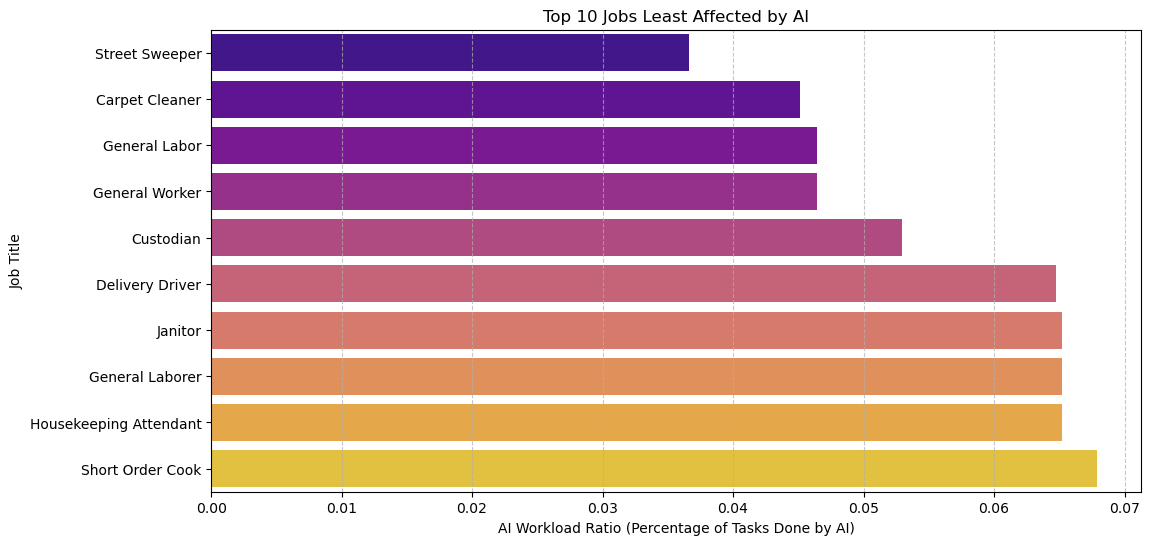

In [58]:
# 10 jobs least affected by AI
import warnings 
warnings.filterwarnings('ignore')
    
low_automation_jobs = df.nsmallest(10, "AI_Workload_Ratio")[["Job Titles", "AI_Workload_Ratio"]]

print("\nTop 10 Jobs Least Affected by AI:")
print(low_automation_jobs)

plt.figure(figsize=(12, 6))
sns.barplot(x="AI_Workload_Ratio", y="Job Titles", data=low_automation_jobs, palette="plasma")

plt.xlabel("AI Workload Ratio (Percentage of Tasks Done by AI)")
plt.ylabel("Job Title")
plt.title("Top 10 Jobs Least Affected by AI")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Correlation between AI Impact and Number of Tasks: -0.4197595382909174


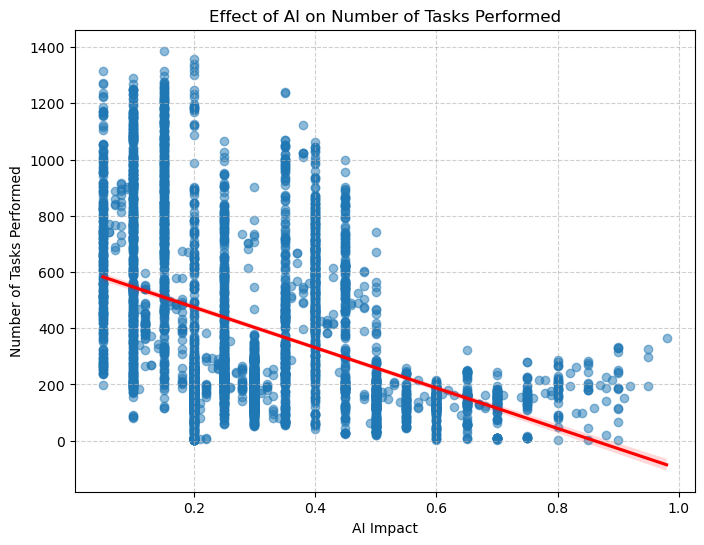

In [66]:
# Correlation between AI Impact and Number of Tasks
task_correlation = df["AI_Impact"].corr(df["Tasks"])
print("\nCorrelation between AI Impact and Number of Tasks:", task_correlation)

plt.figure(figsize=(8, 6))
sns.regplot(x="AI_Impact", y="Tasks", data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("AI Impact")
plt.ylabel("Number of Tasks Performed")
plt.title("Effect of AI on Number of Tasks Performed")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [100]:
# Find industries with high AI adoption but low workload impact
safe_zones = df.groupby("Domain").agg({"AI_Impact": "mean", "AI_Workload_Ratio": "mean"}).reset_index()
safe_zones_filtered = safe_zones[(safe_zones["AI_Impact"] > 0.25) & (safe_zones["AI_Workload_Ratio"] < 0.25)]
print("\nIndustries with High AI Adoption but Low Job Displacement:")
print(safe_zones_filtered)



Industries with High AI Adoption but Low Job Displacement:
                      Domain  AI_Impact  AI_Workload_Ratio
0  Administrative & Clerical   0.303397           0.203383
1         Communication & PR   0.303885           0.200423
2               Construction   0.302936           0.204512
3                  Data & IT   0.303546           0.199763
4                Hospitality   0.302660           0.204731
5            Law Enforcement   0.303085           0.210258
6      Leadership & Strategy   0.303248           0.204877
7       Medical & Healthcare   0.302951           0.204221
8          Sales & Marketing   0.302809           0.207530
9   Supply Chain & Logistics   0.302739           0.206430
